### Week 2 : Images as Signals & Noise removal

#### Date : 14th October, 2021

* This lab session is  is broken down into two sections, the first is just a visual demonstration therefore all you need to do is copy & paste or type out the code from task 1 and run each section.

* The second part requires you to code your own example.

#### Fourier Transform:

* We can use Fourier transforms to decompose an image into its sine and cosine components, resulting in an image in its frequency domain rather than its spatial domain. This has many implications and applications which will be discussed in class.

* Today however we wanted to demonstrate visually this decomposition process. Please note that we are showing you the signal decomposition by taking a 1D slice of the image.

#### Task 1

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
img = cv2.imread('../images/sample_image.jpg', cv2.COLOR_BGR2RGB)# COLOR_BGR2RGB is used to convert the image to RGB

In [3]:
# convert to double and gray scale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = img_gray.astype(np.double) / 255 # convert to double and normalize to [0,1] range 

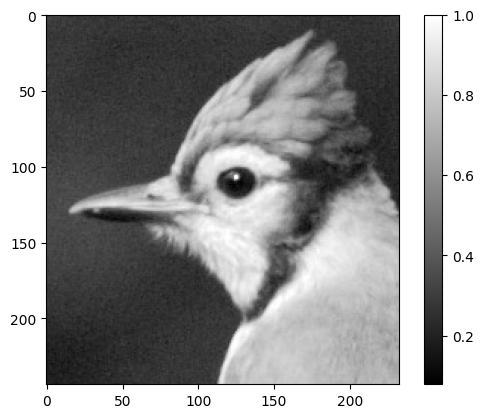

In [4]:
plt.imshow(img_gray, cmap='gray')
plt.colorbar()

(244, 233)
116
[0.31372549 0.32156863 0.36470588 0.3372549  0.3372549  0.34509804
 0.34509804 0.32156863 0.30980392 0.3254902  0.3372549  0.31372549
 0.30588235 0.3372549  0.35686275 0.35294118 0.34901961 0.3254902
 0.3372549  0.34901961 0.34901961 0.32941176 0.35294118 0.34117647
 0.32156863 0.33333333 0.34901961 0.35294118 0.33333333 0.3254902
 0.33333333 0.3372549  0.32941176 0.34509804 0.34509804 0.36470588
 0.35686275 0.35294118 0.35686275 0.37254902 0.39607843 0.42745098
 0.44705882 0.50196078 0.5372549  0.56862745 0.54901961 0.56078431
 0.56470588 0.56862745 0.58823529 0.58431373 0.56470588 0.57647059
 0.62352941 0.65882353 0.65098039 0.65098039 0.64313725 0.69803922
 0.65490196 0.64313725 0.67843137 0.69411765 0.72156863 0.75294118
 0.76470588 0.82745098 0.85098039 0.87058824 0.86666667 0.89019608
 0.87843137 0.86666667 0.8627451  0.89411765 0.89019608 0.87058824
 0.85882353 0.84313725 0.83921569 0.84705882 0.83921569 0.83529412
 0.83137255 0.81568627 0.75686275 0.68235294 0.58

Text(0.5, 1.0, 'Grey-level profile at 116')

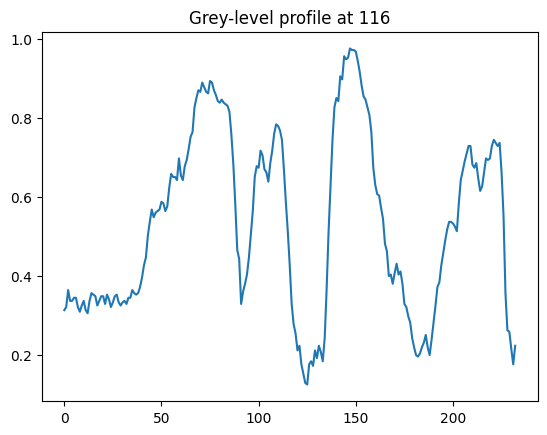

In [8]:
# Next, we take a sample of this image
print(img_gray.shape)  # (height, width)    

row = img_gray.shape[1] // 2 # middle column of the image 
print(row)

x = img_gray[row, :] # extract the row
print(x)
print(x.shape)

plt.plot(x)
plt.title('Grey-level profile at ' + str(row))

Here, we plot the amplitude of these frequencies which is found by taking the absolute value of our FFT signal

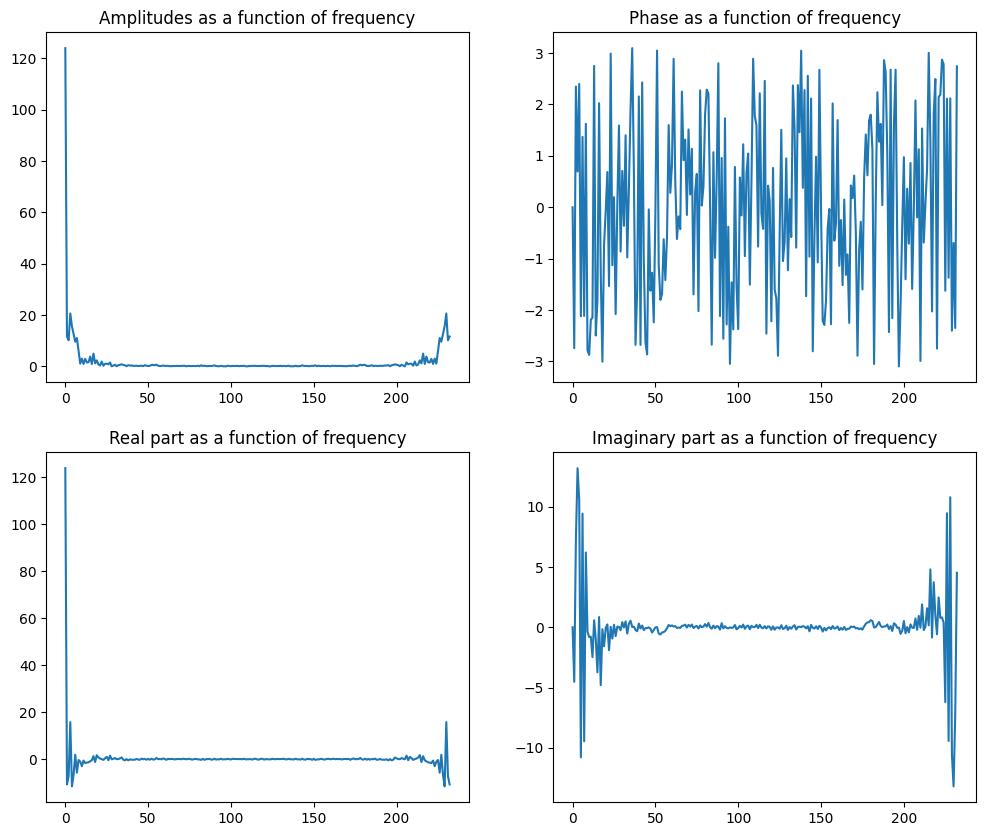

In [6]:
# 위그림에서 피크가 높으면 해당 구간에서 밝기가 크다 (즉, 더 밝은 부분임)을 의미한다.
# 피크가 낮으면 해당 구간에서 밝기가 작다 (즉, 더 어두운 부분임)을 의미한다.
# 피크의 위치는 해당 구간에서 밝기가 변하는 위치를 나타낸다.기울기가 가팔라지는 지점이 피크의 위치이다.
# 고주파수는 밝기가 급격히 변하는 부분을 의미한다. 이미지에서 밝기가 빠르게 변화하는 경계선, 세부적인 패턴을 의미. 
# 저주파수는 밝기가 서서리 변하는 부분을 의미한다. 이미지에서 밝기차이가 거의 없는 넓은 영역, 배경등이 여기에 해당한다. 
# 기울기가 가파를수록 고주파 성분이 많고, 기울기가 완만할수록 저주파 성분이 많다.

# FFT(Fast Fourier Transform, 고속 푸리에 변환)은 복잡한 신로를 주파수 영역으로 변환하는 매우 효율적인 알고리즘이다. 
# 기본적으로 시간영역에서 주어진 1차원 신호를 주파수 영역으로 변환하여, 신호가 어떤 주파수 성분들로 이루어져 있는지 확인할 수 있게 해준다. 

# 여기서 주파수는 이미지 밝기 값의 변화 (그레이 스케일 값의 변화)가 얼마나 자주 일어나는지를 설명하는 개념이다. (이미지 내의 변화의 빈도) 
# 고주파수 부분: 밝기가 급격히 변하는 영역 => 이미지의 경계선이나 세부적인 패턴 등이 여기에 해당한다.진폭이 낮다
# 저주파수 부분: 밝기가 서서히 변하는 영역 => 이미지의 배경이나 노이즈 등이 여기에 해당한다.진폭이 높다, 

# 위상(Phase)**은 주파수 성분이 언제 나타나는지, 즉, 신호에서 그 성분이 발생하는 위치를 설명합니다.

X = np.fft.fft(x)
N = len(x)
fig = plt.figure(figsize=(12, 10))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text('Amplitudes as a function of frequency')
plt.plot(np.abs(X))

ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text('Phase as a function of frequency')
theta = np.arctan2(np.imag(X), np.real(X))
plt.plot(theta)

ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text('Real part as a function of frequency')
plt.plot(np.real(X))

ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text('Imaginary part as a function of frequency')
plt.plot(np.imag(X))


Next we are going to see the individual components that make up this signal, showing just a sub sample of these. Let us consider the inverse FFT

\begin{align}
x[n] & = \sum_{k=0}^{N-1} X[k]e^{j\omega_N n} \\
& = \sum_{k=0}^{N-1} |X[k]|e^{j\phi_k} e^{j\omega_N n} \\
& = \sum_{k=0}^{N-1} |X[k]|e^{j(\omega_N n + \phi_k)}
\end{align}

Now you may ask why $X[k]=|X[k]|e^{j\phi_k}$? 

Let $X[k] = a + bj$, we have 

$$
|X[k]| = \sqrt{a^2 + b^2}, \quad \phi = \arctan(\frac{b}{a})
$$

Then, we have 

$$
\begin{align}
X[k] &=|X[k]|e^{j\phi_k}\\
&= |X[k]|(\cos(\phi_k) + j\sin(\phi_k) )\\
&= |X[k]| (\frac{a}{|X[k]|} + j \frac{b}{|X[k]|})\\
&= a + jb
\end{align}
$$

Great! Now we can represent $x[n]$ using a set of cosine wave:

$$
\begin{align}
x[n] & = \sum_{k=0}^{N-1} |X[k]|e^{j(\omega_N n + \phi_k)}\\
&=  \sum_{k=0}^{N-1} |X[k]| (\cos(\omega_N n + \phi_k) + j\sin(\omega_N n + \phi_k))\\
&=  \sum_{k=0}^{N-1} |X[k]|\cos(\omega_N n + \phi_k)
\end{align}
$$

You may ask why we only keep the real part, well, for now I would say $x[n]$ is a real function, thus, the imaginary part must be cancelled. OK now run the code and see what is happening:)

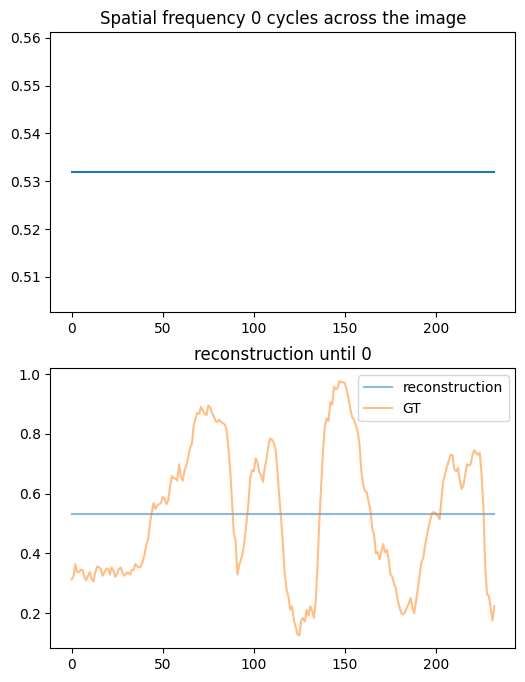

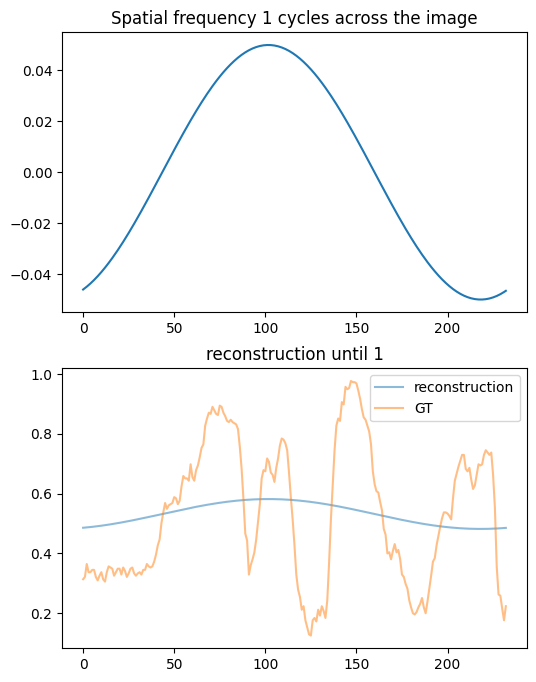

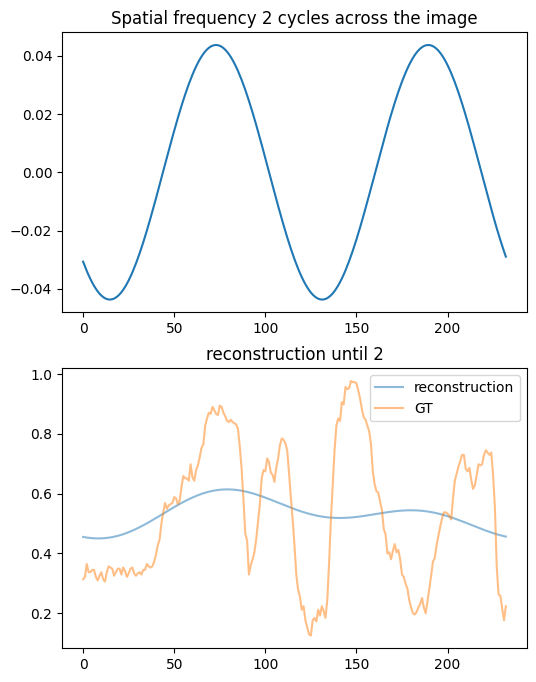

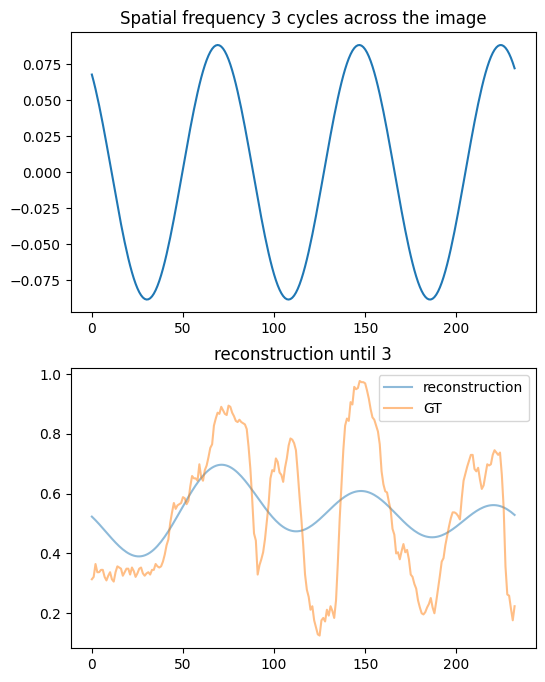

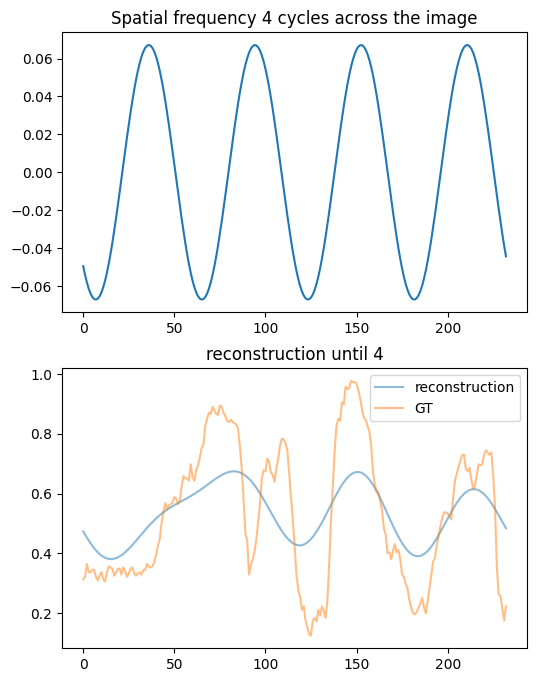

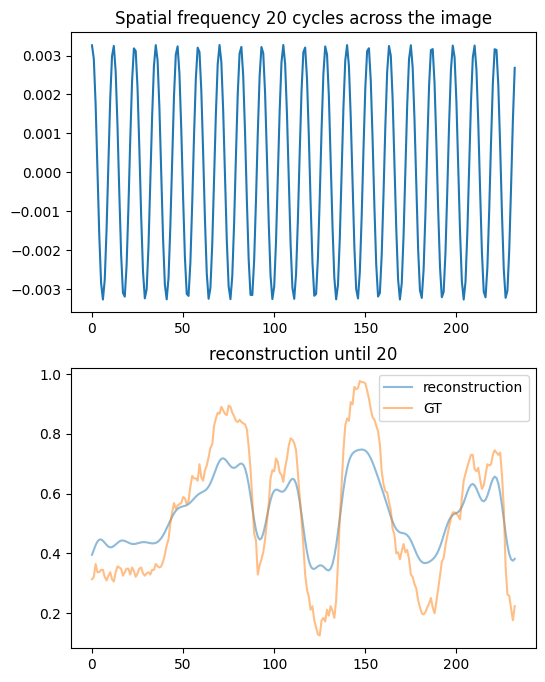

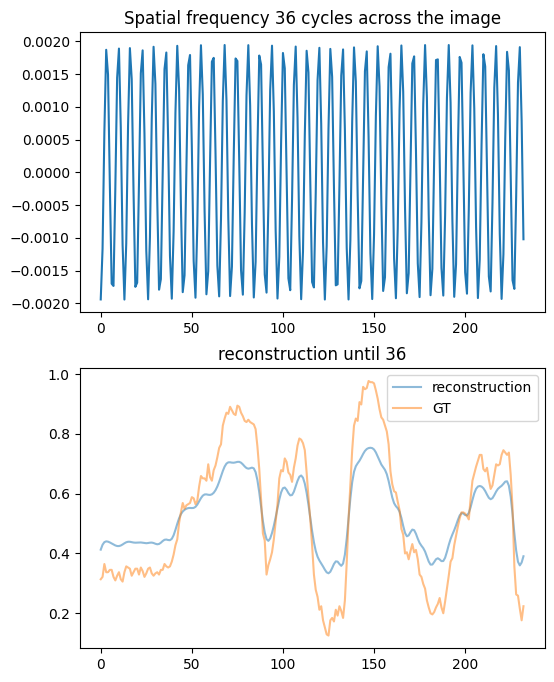

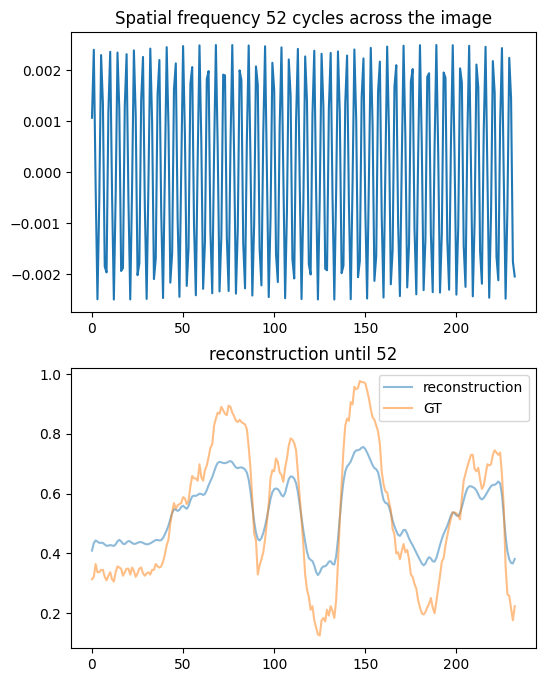

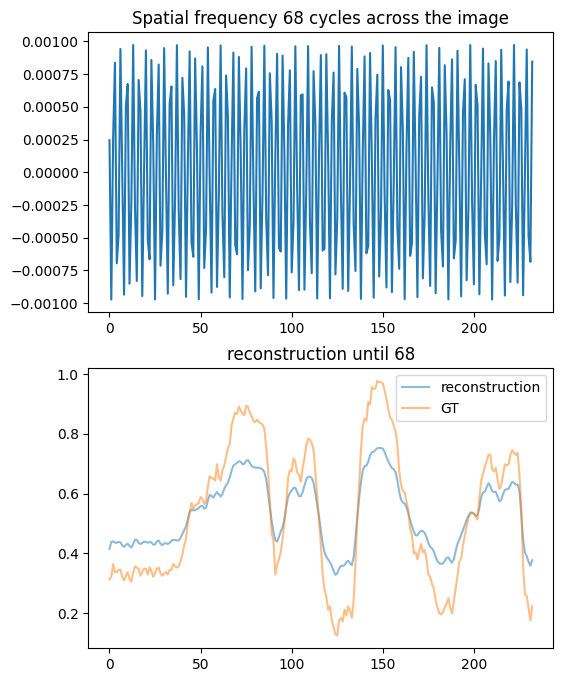

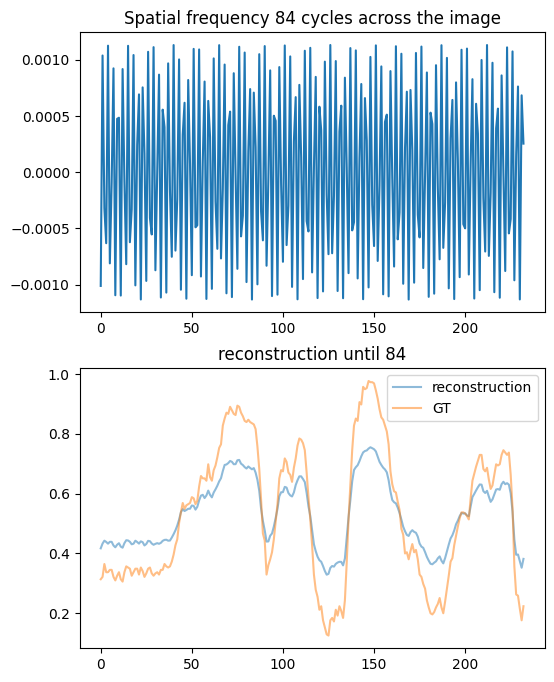

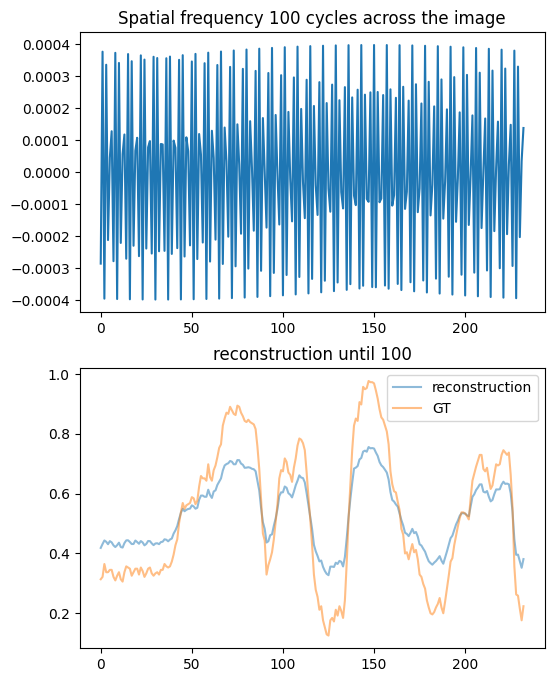

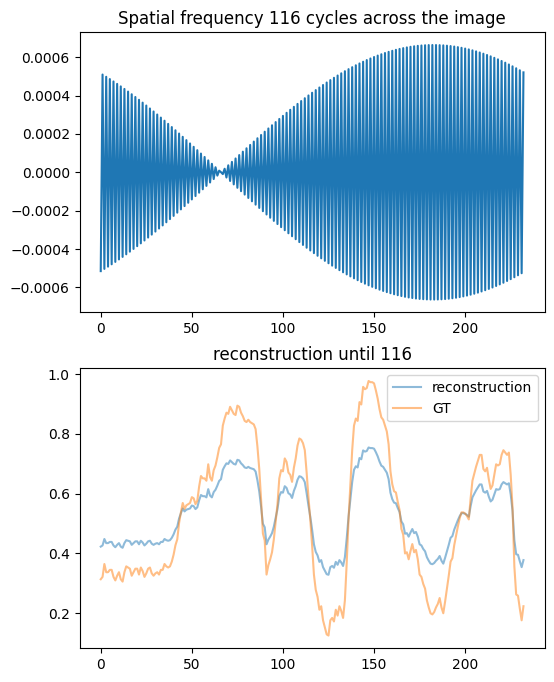

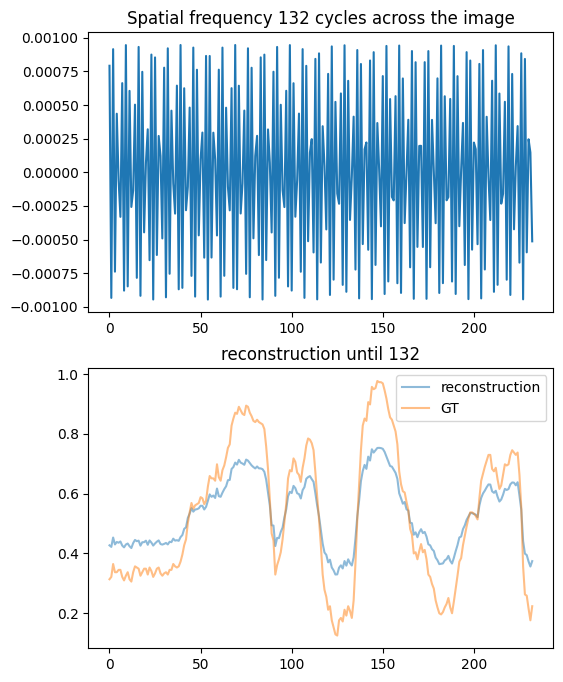

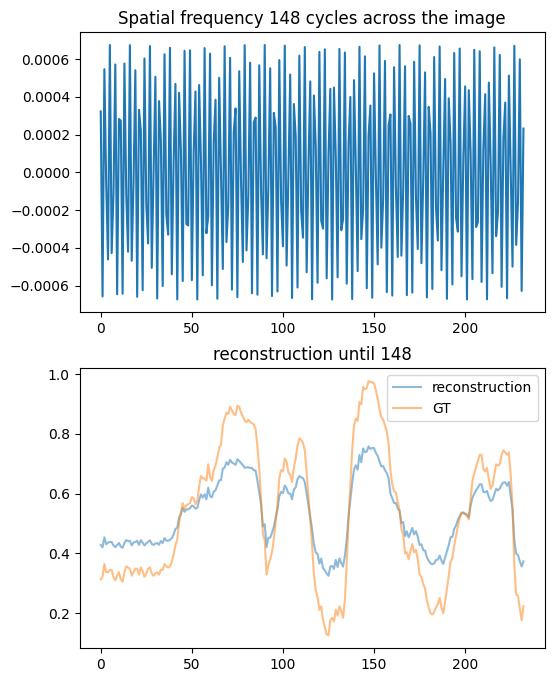

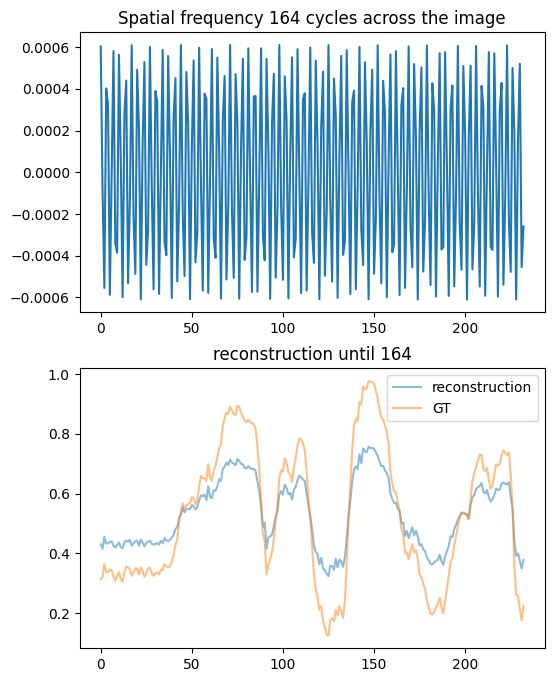

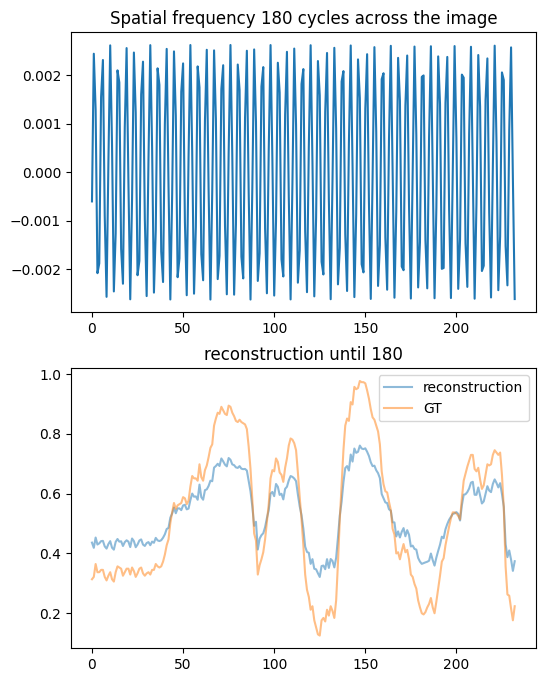

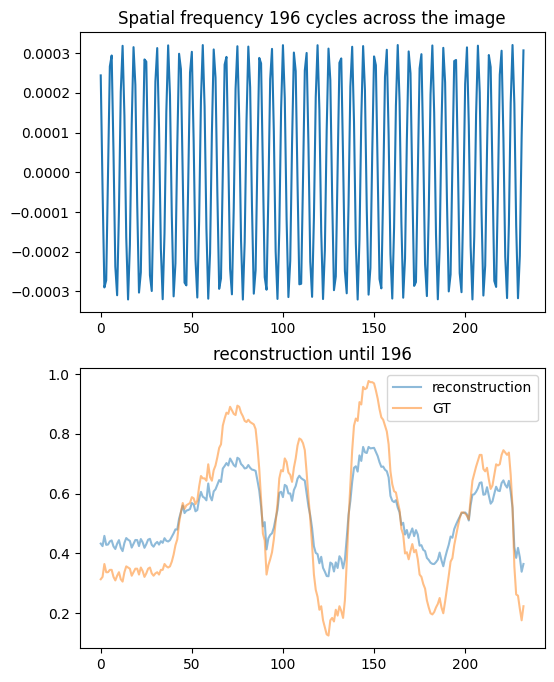

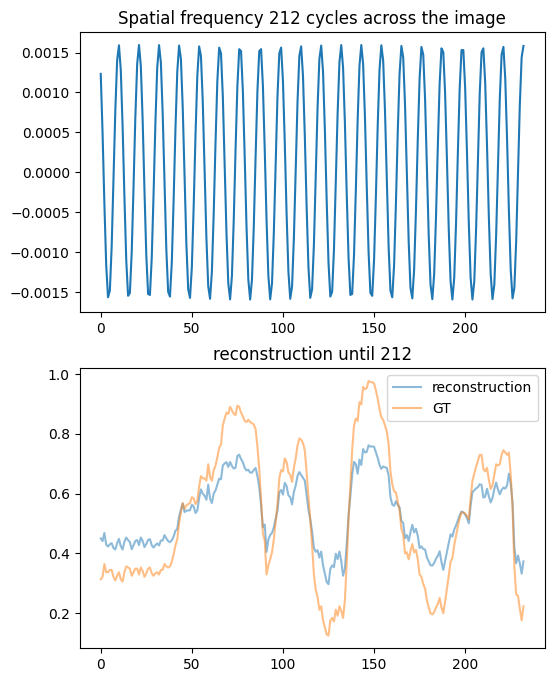

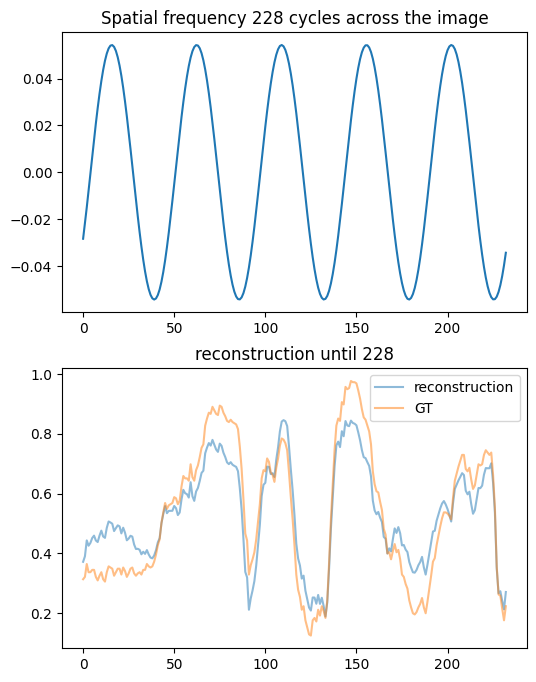

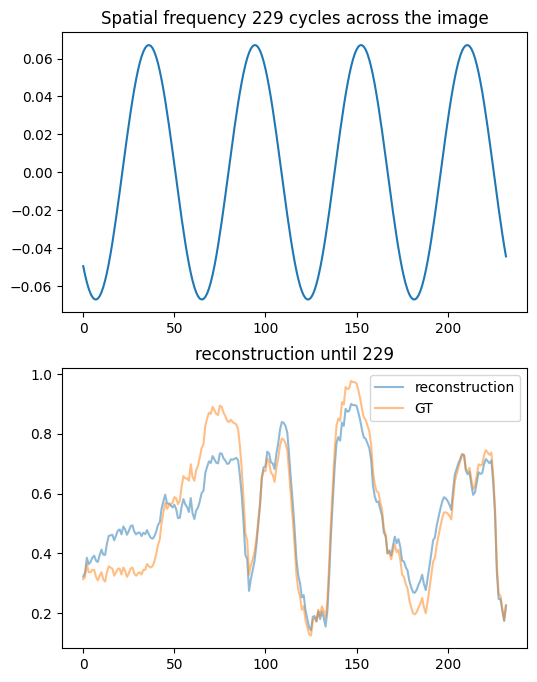

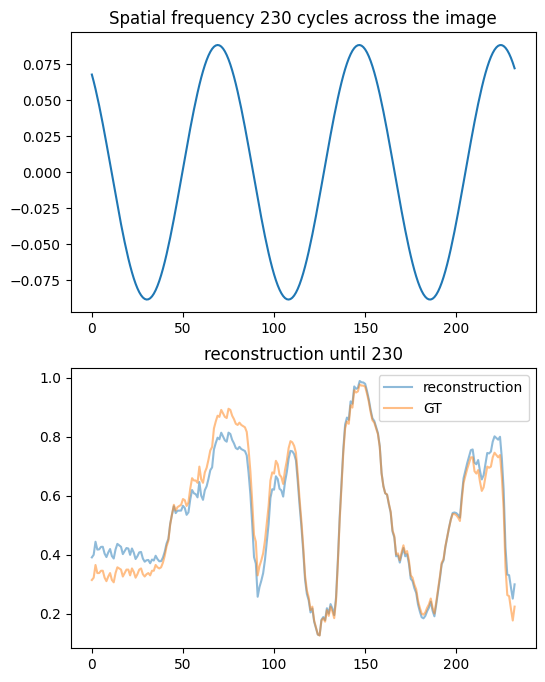

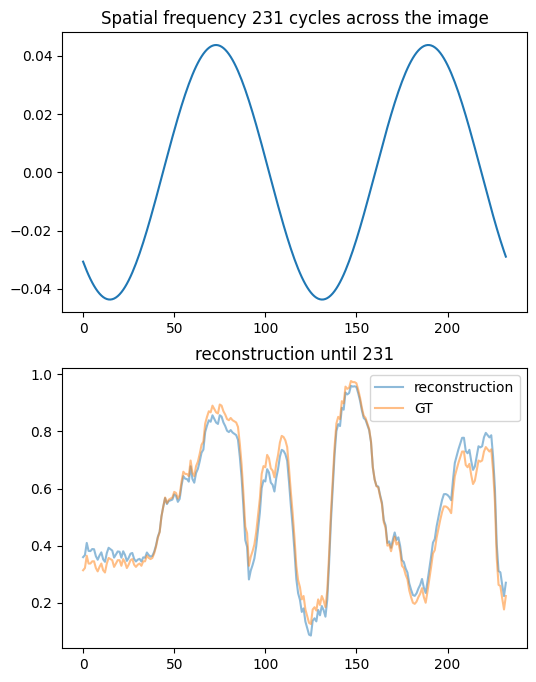

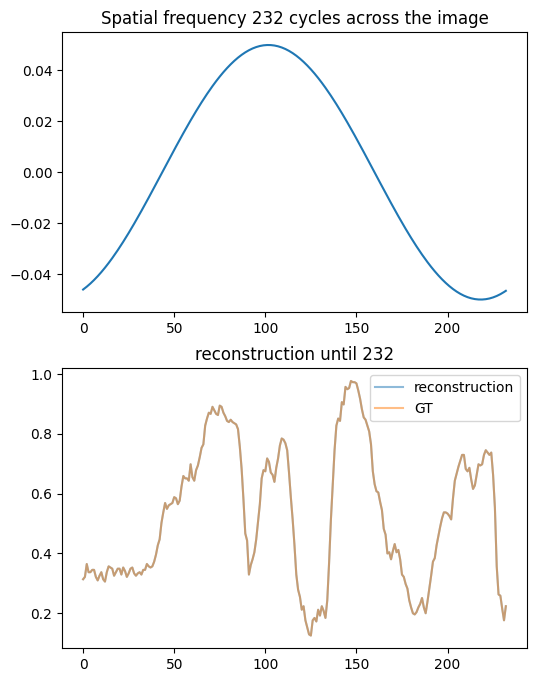

In [7]:
N = len(X)
reconstruction = 0.
p = 2 * np.pi * np.arange(N) / N # 0 to 2*pi
check_points = [i for i in range(0, 4)] + [i for i in range(4, N - 4, 16)] + [i for i in range(N - 4, N)]

for k in range(0, N):
    # decompose X[k] into magnitude and phase
    a = np.abs(X[k])
    theta = np.arctan2(np.imag(X[k]), np.real(X[k]))
    phi = k * p + theta
    component = a * np.cos(phi) / N
    reconstruction += component
    if k in check_points:
        fig, ax = plt.subplots(2, 1, figsize=(6,8))
        
        ax[0].plot(component)
        ax[0].set_title('Spatial frequency ' + str(k) + ' cycles across the image')
        
        ax[1].plot(reconstruction, alpha=0.5, label='reconstruction')
        ax[1].plot(x, alpha=0.5, label='GT')
        ax[1].legend()
        ax[1].set_title('reconstruction until ' + str(k))
        plt.show()



Great! Now can we get rid of the phase and represent the original signal using sine and cosine wave?

Yes, we can:

$$
\begin{align}
x[n] &=  \sum_{k=0}^{N-1} |X[k]|\cos(\omega_N n + \phi_k)\\
&=  \sum_{k=0}^{N-1} |X[k]|(\cos(\phi_k)\cos(\omega_N) - \sin(\phi_k)\sin(\omega_N))\\
&= \sum_{k=0}^{N-1} \mathrm{Re}(X[k])\cos(\omega_N) - \mathrm{Im}(X[k])\sin(\omega_N)
\end{align}
$$

Cool now run the following code:)

In [ ]:
N = len(X)
reconstruction = 0.
p = 2 * np.pi * np.arange(N) / N # 0 to 2*pi
check_points = [i for i in range(0, 8)] + [i for i in range(8, N - 8, 16)] + [i for i in range(N - 8, N)]

for k in range(0, N):
    # sine + cosine
    phi = k * p
    component = (np.real(X[k]) * np.cos(phi) - np.imag(X[k]) * np.sin(phi)) / N
    reconstruction += component
    if k in check_points:
        fig, ax = plt.subplots(2, 1, figsize=(6,8))
        
        ax[0].plot(component)
        ax[0].set_title('Spatial frequency ' + str(k) + ' cycles across the image')
        
        ax[1].plot(reconstruction, alpha=0.5, label='reconstruction')
        ax[1].plot(x, alpha=0.5, label='GT')
        ax[1].legend()
        ax[1].set_title('reconstruction until ' + str(k))
        plt.show()
    

### Task 2: Noise removal

* For those of you who have experienced taking images in low lighting conditions you will inevitably have come across issues with noise, this is usually caused by having to use a very high ISO level. 

* The ISO setting is used to control the speed of the camera by amplifying the sensitivity of the cameras sensor.
 
* Today we will code two simple techniques that can be used to remove or reduce this noise. This does come at a price however by removing some fine details, as you will see.

#### Median Filter

* Your first task is to write a Median Filter. To start off with I would advise that you work on gray scale images. Once you manage this you can then figure out how to apply this to a colour image.

* The median filter works by iterating over an image using a sliding window (you can set the size, I would recommend something like 3x3 or 5x5). Each pixel will be replaced with the median pixel value of the values in the box. 

* Given this below matrix

$$\begin{bmatrix} 128 & 50 & 120 \\ 10 & \color{Red}{214} & 150 \\ 127 & 157 & 137 \end{bmatrix}$$

* After the median filter, the 214 would be replaced by the median value - 128

* Please implement your code using numpy only - compare the result with opencv later


[[  0.  50.   0.]
 [ 50. 128. 120.]
 [  0. 127.   0.]]


Text(0.5, 1.0, 'Median Blurred')

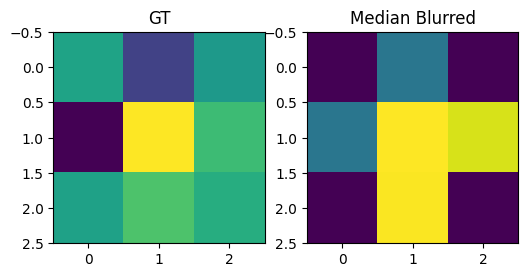

In [ ]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

def median_filter(img, filter_size=3):
    height, width = img.shape 
    filtered_img = np.zeros((height, width)) 
    
    pad_size = filter_size // 2 
    padded_img = np.pad(img, pad_size, mode='constant', constant_values=0) # zero padding
    
    # sliding window 
    for i in range(height):
        for j in range(width):
            window = padded_img[i:i+filter_size, j:j+filter_size]
            # calculate median value
            median_val = np.median(window)
            # assign the median value to the center pixel
            filtered_img[i, j] = median_val
    
    return filtered_img

img = np.array([[128, 50, 120],
                [10, 214, 150],
                [127, 157, 137]])


filtered_img = median_filter(img, filter_size=3)
print(filtered_img)

# Answer
fig, ax = plt.subplots(1, 2, figsize=(6,10)) # 1 row, 2 columns, figsize=(width, height)
ax[0].imshow(img)
ax[0].set_title('GT')
ax[1].imshow(filtered_img)
ax[1].set_title('Median Blurred')

#### Adaptive Filter

* Once you have completed the median filter on a colour image applying an Adaptive filter will be very easy. 

* This time all you need to do is compute the new pixel taking its variance into account and thus helping to preserve edges and details. This can be done using the following formula:

* Mean: 

$$\mu_{i, j} = \frac{1}{|\mathcal{K}_{i,j}|}\sum_{n_1, n_2 \in \mathcal{K}_{i,j}} \mathcal{K}_{i,j}(n_1, n_2)$$




* Variance:

$$\sigma^2_{i, j} = \frac{1}{|\mathcal{K}_{i, j}|}\sum_{n_1, n_2 \in \mathcal{K}_{i,j}} (\mathcal{K}_{i,j}(n_1, n_2) - \mu_{i, j})^2$$

* Output Pixel:

$$I'(i, j) = \mu_{i, j} + \max(\frac{\sigma^2_{i, j} - v^2_{i, j}}{\sigma^2_{i, j}}, 0)(I(i, j)-\mu_{i, j})$$   


where $\mathcal{K}$ is a (n, n) kernel. $v^2$ is the noise variance and can be eiter specified by the user or taken as the average of all local estimated variances

Question: Think about why we need $\max(\frac{\sigma^2_{i, j} - v^2_{i, j}}{\sigma^2_{i, j}}, 0)$ instead of using $\frac{\sigma^2_{i, j} - v^2_{i, j}}{\sigma^2_{i, j}}$？

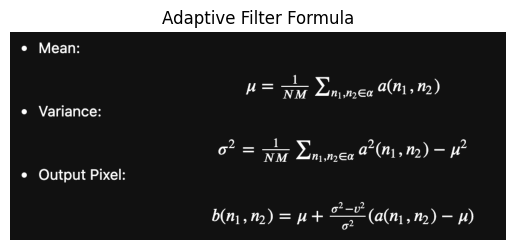

In [9]:
formula_img = cv2.imread('../images/formula_adaptive_filter.png')
plt.title('Adaptive Filter Formula')
plt.imshow(formula_img)
plt.axis('off')
plt.show()

[[127.99983983  50.0000431  119.99989797]
 [ 10.00011188 213.9997076  149.99990045]
 [126.99989052 156.99989293 136.9999096 ]]


Text(0.5, 1.0, 'Adaptive Filter')

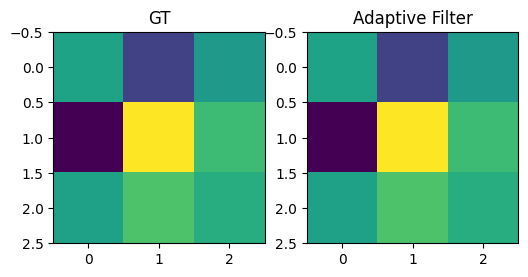

In [ ]:
# One answer
def adaptive_filter(img, filter_size=3, noise_variance=0.01):
    height, width = img.shape 
    filtered_img = np.zeros((height, width)) 
    
    pad_size = filter_size // 2
    padded_img = np.pad(img, pad_size, mode='constant', constant_values=0) # zero padding
    
    # sliding window
    for i in range (height):
        for j in range (width):
            window = padded_img[i:i+filter_size, j:j+filter_size]
            # calculate local mean and variance
            local_mean = np.mean(window)
            local_variance = np.var(window)
            
            # Adaptive filter formula
            if local_variance > 0.01: 
                adaptive_value = local_mean + (local_variance - noise_variance) / local_variance * (img[i, j] - local_mean)
            else:
                adaptive_value = local_mean
            
            filtered_img[i, j] = adaptive_value
    
    return filtered_img


filtered_img = adaptive_filter(img, filter_size=3, noise_variance=0.01)
print(filtered_img)

fig, axes = plt.subplots(1,2,figsize=(6,10))
axes[0].imshow(img)
axes[0].set_title('GT')
axes[1].imshow(filtered_img)
axes[1].set_title('Adaptive Filter')

#### Filtering vectorized

* Using as little number of for-loops as possible, perform median filtering on the colour input.

* The vectorized down-sampling code from last week could be a good start. Try to pre-calculate the filter kernel (the array of weights) and use the .* operator to multiply 1-D arrays with each other.

* How much space does your method need for an 11x11 median filtering on a 3 channel (uint8)image? 

* Using the package - *time* does your algorithm compare to the built-in median filtering of opencv? Also, measure the difference between your implementation and opencv

In [ ]:
import numpy as np
import cv2
import time
from skimage.util.shape import view_as_windows

def median_filter_vectorized(image, filter_size=11):
    # initialize the filtered image
    pad_size = filter_size // 2
    
    # add padding to the image
    if len(image.shape) == 2:  # if the image is grayscale
        padded_img = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant', constant_values=0)
    else:  # if the image is color
        padded_img = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant', constant_values=0)
    
    # create windows for each pixel in the image
    windows = view_as_windows(padded_img, (filter_size, filter_size, image.shape[2]))
    h, w = windows.shape[:2]  # keep the height and width of the image
    
    # initialize the filtered image
    filtered_img = np.zeros((h, w, image.shape[2]), dtype=np.uint8)
    
    # iterate over each channel
    for channel in range(3):
        # calculate the median value for each window and each channel
        filtered_img[..., channel] = np.median(windows[..., channel], axis=(2, 3))
    
    return filtered_img

In [53]:
H = 1080
W = 1920
num_channels = 3
filter_size = 11
window_size = filter_size * filter_size

# Total space required in bytes
total_space_bytes = H * W * num_channels * window_size
total_space_megabytes = total_space_bytes / (1024 * 1024)

print(f"Total space needed: {total_space_megabytes:.2f} MB")


Total space needed: 717.85 MB


In [ ]:
img = np.array([
    [[180, 20, 20], [190, 30, 25], [200, 40, 30], [210, 45, 35], [220, 50, 40]],
    [[175, 18, 18], [185, 28, 23], [195, 38, 28], [205, 43, 33], [215, 48, 38]],
    [[170, 16, 16], [180, 26, 21], [190, 36, 26], [200, 41, 31], [210, 46, 36]],
    [[165, 14, 14], [175, 24, 19], [185, 34, 24], [195, 39, 29], [205, 44, 34]],
    [[160, 12, 12], [170, 22, 17], [180, 32, 22], [190, 37, 27], [200, 42, 32]]
])


# median filter using vectorized implementation
start_time = time.time()
filtered_image = median_filter_vectorized(img, filter_size=3)
print("Vectorized Median Filter Time: {:.4f} seconds".format(time.time() - start_time))

# display the images
cv2.imshow('Original Image', img)
cv2.imshow('Filtered Image', filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



#### Gaussian & Bilateral Filter

For this part, you do not need to implement anything. We provide the code using OpenCV for gaussian filter and Bilateral filter. You can explore relevant materials to understand Gaussian & Bilateral filter and play with different kernel size and sigma.

##### Gaussian filter

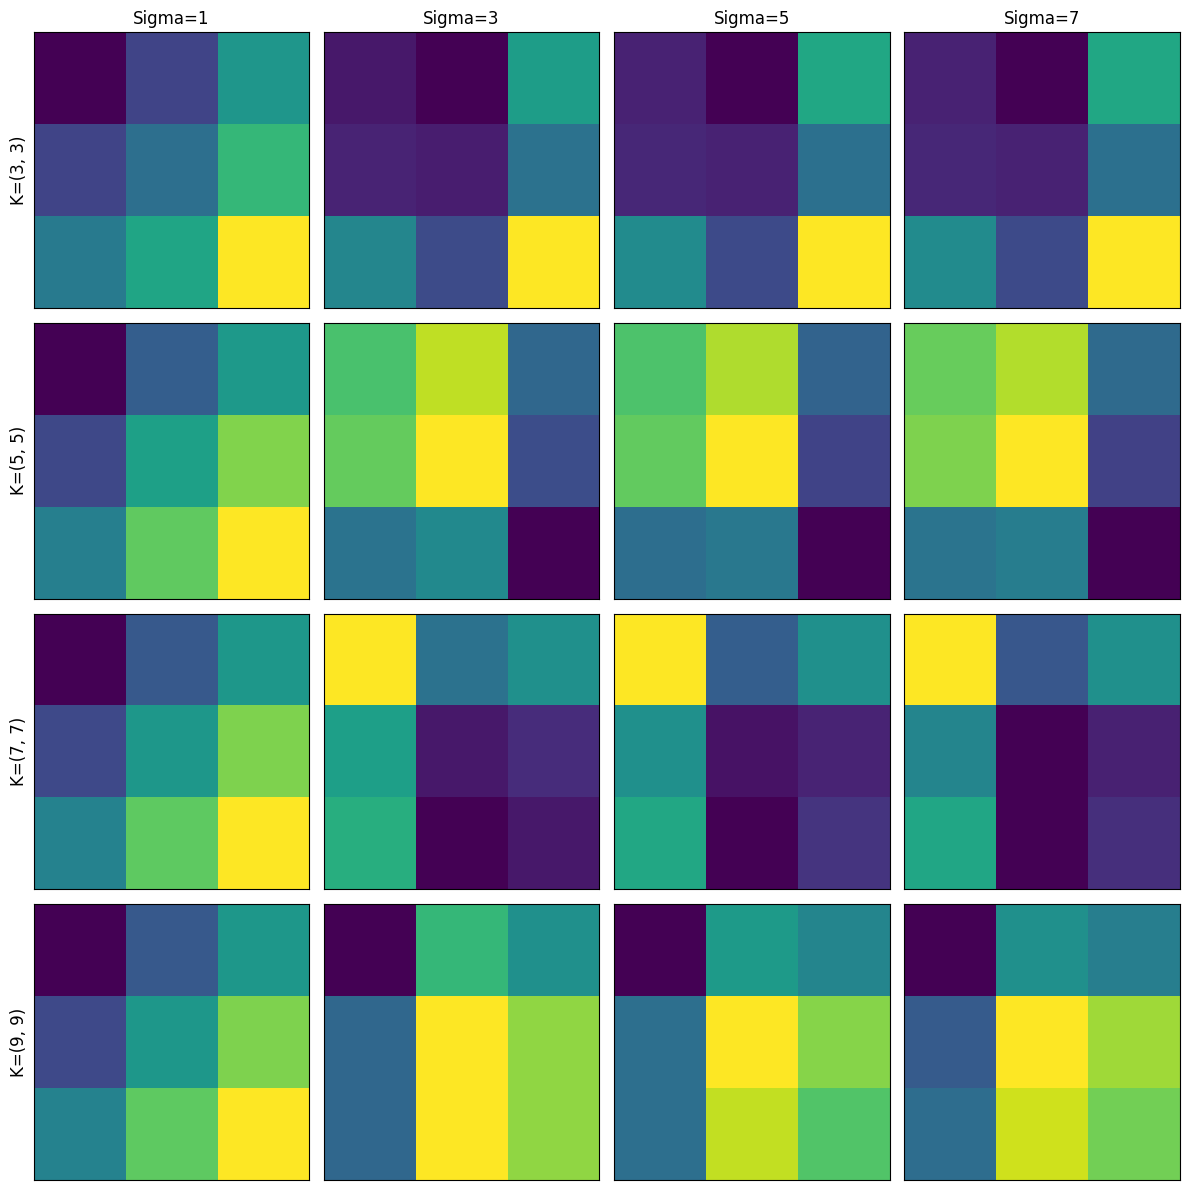

In [60]:
import cv2
import matplotlib.pyplot as plt

# Define sigma values and kernel sizes
sigma_values = [1, 3, 5, 7]
kernel_sizes = [(3, 3), (5, 5), (7, 7), (9, 9)]

cols = [f"Sigma={sigma}" for sigma in sigma_values]
rows = [f"K={kernel_size}" for kernel_size in kernel_sizes]

# Ensure the image is in the correct format
img = img.astype(np.uint8)

fig, axes = plt.subplots(nrows=len(kernel_sizes), ncols=len(sigma_values), figsize=(12, 12))

for i, kernel_size in enumerate(kernel_sizes):
    for j, sigma in enumerate(sigma_values):
        # Apply Gaussian Blur
        filtered_img = cv2.GaussianBlur(img, kernel_size, sigma)

        axes[i, j].imshow(filtered_img)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:, 0], rows):
    ax.set_ylabel(row, rotation=90, size='large')

fig.tight_layout()
plt.show()


##### Bilateral filter

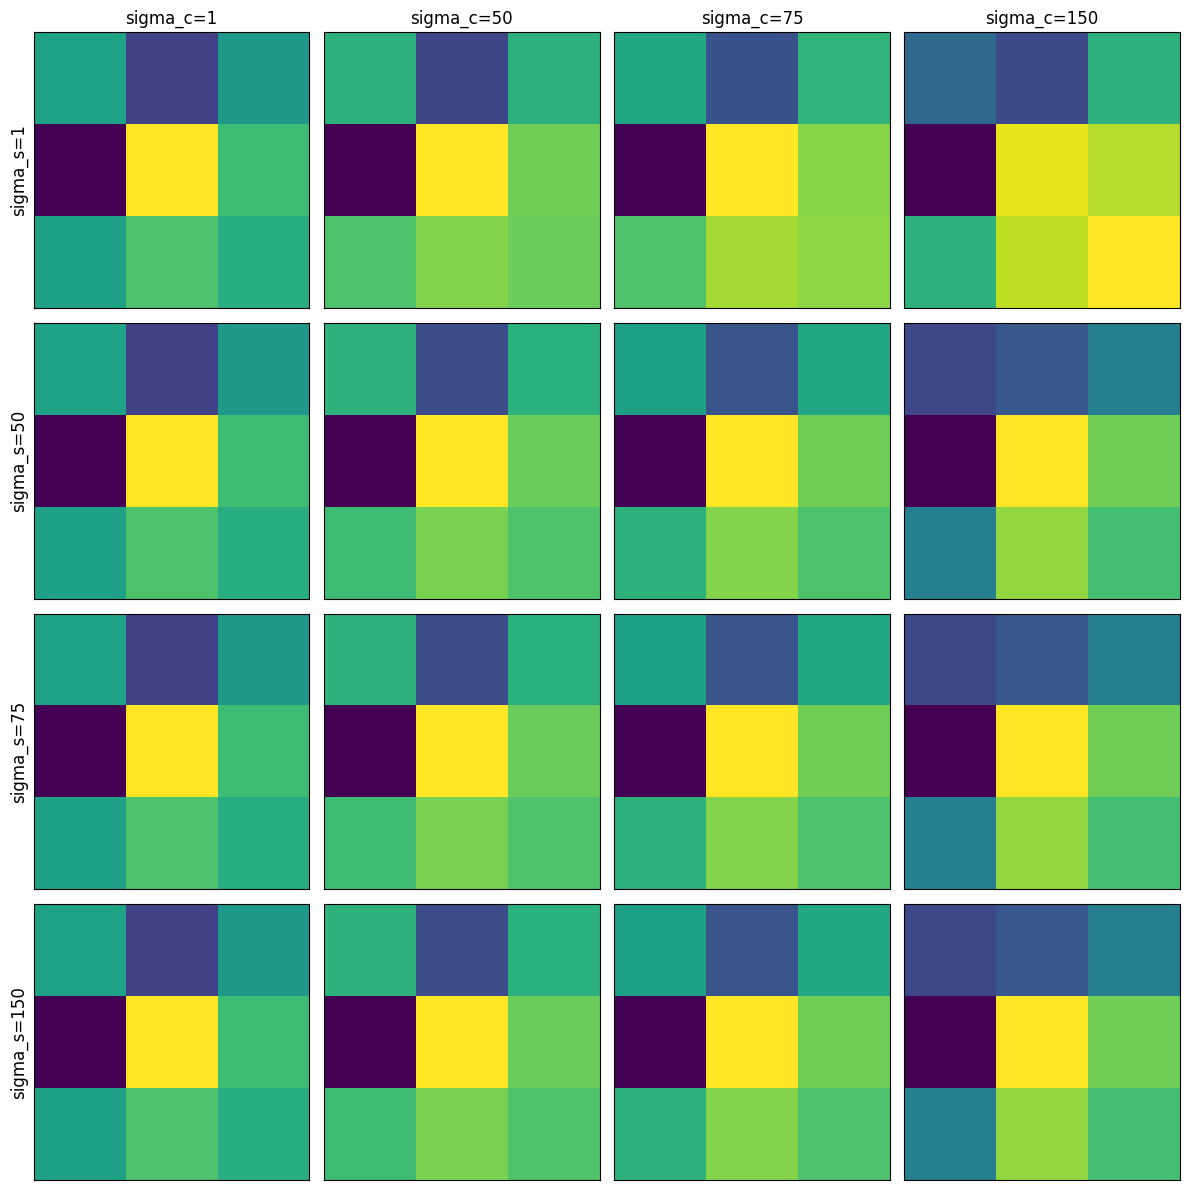

In [61]:
# Define sigma values
intensity_sigma_values = [1, 50, 75, 150]  # SigmaColor
space_sigma_values = [1, 50, 75, 150]      # SigmaSpace

cols = [f"sigma_c={sigma}" for sigma in intensity_sigma_values]
rows = [f"sigma_s={sigma}" for sigma in space_sigma_values]
fig, axes = plt.subplots(nrows=len(space_sigma_values), ncols=len(intensity_sigma_values), figsize=(12, 12))


for i, space_sigma in enumerate(space_sigma_values):
    for j, intensity_sigma in enumerate(intensity_sigma_values):
        # Apply bilateral filter
        filtered_img = cv2.bilateralFilter(img, d=11, sigmaColor=intensity_sigma, sigmaSpace=space_sigma)
        
        axes[i, j].imshow(filtered_img)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:, 0], rows):
    ax.set_ylabel(row, rotation=90, size='large')

fig.tight_layout()
plt.show()
